# Import the usual suspects

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%matplotlib inline

# Get and clean Data

* Drop irrelevant columns
* Define features
* Define Label i.e target column

In [0]:
df = pd.read_csv('data.csv')

In [0]:
df.head(10)

,Unnamed: 0,Date,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,...,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
0,87,2010/02/17,Anglogold Ashanti Ltd,29500.0,-0.103343,30598.216667,1854.530002,850.55,0.090136,-0.016852,...,329.5,431.7,317.9,3.9,3.9,732.8,237.2,220.7,454.3,959.6


In [0]:
df.drop(['Unnamed: 0', 'Date', 'company'], axis = 1, inplace = True)

In [0]:
df.head(1)

,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,Revenue,Cost_of_Sales,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
0,29500.0,-0.103343,30598.216667,1854.530002,850.55,0.090136,-0.016852,7.08,951.4,621.9,329.5,431.7,317.9,3.9,3.9,732.8,237.2,220.7,454.3,959.6


In [0]:
X = df.drop(('target_return'), axis = 1)

In [0]:
y = df['target_return']

In [0]:
X.columns

Index(['current_price', 'momentum', 'moving_average', 'moving_volatility',
       'trading_range', 'exp_market_change', 'rates', 'Revenue',
       'Cost_of_Sales', 'Gross_profit', 'Operating_profit', 'Net_Profit',
       'Issue_of_shares', 'Share_repurchase', 'Non_current_assets',
       'Current_assets', 'Non_current_liabilities', 'Current_liabilities',
       'net_cash_op_act'],
      dtype='object')

# Split Data 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Select and Train Model

In [0]:
from sklearn.svm import SVR

In [0]:
svr_lin = SVR()

In [0]:
svr_lin = SVR(kernel='linear', C = 1e3)
svr_poly = SVR(kernel='poly', C = 1e3, degree = 2)
svr_rbf = SVR(kernel='rbf', C = 1e3, gamma = 0.1)

In [0]:
svr_lin.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predictions and Model Evaluation

In [0]:
from sklearn import metrics

In [0]:
pred_lin1 = svr_lin.predict(X_test)
pred_poly1 = svr_poly.predict(X_test)
pred_rbf1 = svr_rbf.predict(X_test)

In [0]:
# Get predictions for train data
pred_lin_train = svr_lin.predict(X_train)
pred_poly_train = svr_poly.predict(X_train)
pred_rbf_train = svr_rbf.predict(X_train)

# Print MSE for models
print('MSE (train)')
print('Linear:', metrics.mean_squared_error(y_train, pred_lin_train))
print('Poly:', metrics.mean_squared_error(y_train, pred_poly_train))
print('RBF:', metrics.mean_squared_error(y_train, pred_rbf_train))

MSE (train)
Linear: 0.0170310337634
Poly: 0.0124758944436
RBF: 0.00764008282328


In [0]:
# Get predictions for test data
pred_lin_test = svr_lin.predict(X_test)
pred_poly_test = svr_poly.predict(X_test)
pred_rbf_test = svr_rbf.predict(X_test)

# Print MSE for models
print('MSE (test)')
print('Linear:', metrics.mean_squared_error(y_test, pred_lin_test))
print('Poly:', metrics.mean_squared_error(y_test, pred_poly_test))
print('RBF:', metrics.mean_squared_error(y_test, pred_rbf_test))

MSE (test)
Linear: 0.0135279102111
Poly: 25.0025010469
RBF: 0.0517414062996


In [0]:
print('R SQUARED SCORE(Train)')
print('Linear:', svr_lin.score(X_train, y_train))
print('Poly:', svr_poly.score(X_train, y_train))
print('RBF:', svr_rbf.score(X_train, y_train))

R SQUARED SCORE(Train)
Linear: 0.0853259034737
Poly: 0.32996565933
RBF: 0.589679290708


In [0]:
print('R SQUARED SCORE(Test)')
print('Linear:', svr_lin.score(X_test, y_test))
print('Poly:', svr_poly.score(X_test, y_test))
print('RBF:', svr_rbf.score(X_test, y_test))

R SQUARED SCORE(Test)
Linear: -0.339274102705
Poly: -2474.26791888
RBF: -4.122441265


# Regularization and R- Squared 

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [0]:
pred_rbf = svr_rbf.predict(X_train)
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.001)

In [0]:
#pred_rbf.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
from sklearn import metrics

In [0]:
# Get predictions for training data
fit_ridge = ridge.predict(X_train)
fit_lasso = lasso.predict(X_train)
pred_lin_train = svr_lin.predict(X_train)
pred_poly_train = svr_poly.predict(X_train)
pred_rbf_train = svr_rbf.predict(X_train)


print('MSE (train)')
print('Ridge:', metrics.mean_squared_error(y_train, fit_ridge))
print('Lasso:', metrics.mean_squared_error(y_train, fit_lasso))
print('RBF:', metrics.mean_squared_error(y_train, pred_rbf_train))

MSE (train)
Ridge: 0.0167893266298
Lasso: 0.017047037249
RBF: 0.00764008282328


In [0]:
# Get predictions for testing data

fit_ridge = ridge.predict(X_test)
fit_lasso = lasso.predict(X_test)
pred_lin_test = svr_lin.predict(X_test)
pred_poly_test = svr_poly.predict(X_test)
pred_rbf_test = svr_rbf.predict(X_test)


print('MSE (test)')
print('Ridge:', metrics.mean_squared_error(y_test, fit_ridge))
print('Lasso:', metrics.mean_squared_error(y_test, fit_lasso))
print('Linear:', metrics.mean_squared_error(y_test, pred_lin_test))
print('Poly:', metrics.mean_squared_error(y_test, pred_poly_test))
print('RBF:', metrics.mean_squared_error(y_test, pred_rbf_test))

MSE (test)
Ridge: 0.0109138455629
Lasso: 0.010806727035
Linear: 0.0135279102111
Poly: 25.0025010469
RBF: 0.0517414062996


# Adjust R-Squared

In [0]:
def adj_r2_score(model,y,yhat):
    adj = 1 - (1 - metrics.r2_score(y,yhat)) * float(len(y)-1) / (len(y)-len(model.coef_)-1)
    return adj

In [0]:
print('Adjusted R-SQUARED SCORES(Train)')
print('Linear:', adj_r2_score(svr_lin, y_train, svr_lin.predict(X_train)))
print('Ridge:', adj_r2_score(ridge, y_train, ridge.predict(X_train)))
print('Lasso:', adj_r2_score(lasso, y_train, lasso.predict(X_train)))

Adjusted R-SQUARED SCORES(Train)
Linear: 0.0816817835672
Ridge: 0.0247784980837
Lasso: 0.00980917008999


In [0]:
print('Adjusted R-SQUARED SCORES(Test)')
print('Linear:', adj_r2_score(svr_lin, y_test, svr_lin.predict(X_test)))
print('Ridge:', adj_r2_score(ridge, y_test, ridge.predict(X_test)))
print('Lasso:', adj_r2_score(lasso, y_test, lasso.predict(X_test)))

Adjusted R-SQUARED SCORES(Test)
Linear: -0.351790683105
Ridge: -0.311143758218
Lasso: -0.2982749863


# Visualizing Results - svm

In [0]:
# Regression chart.
def chart_regression(pred,y,sort=False):
    t = pd.DataFrame({'pred' : pred, 'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('target_return')
    plt.title('Lasso - Regularization')
    plt.legend()
    plt.show()

In [0]:
# Predict and measure RMSE
pred = model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),y_test)

In [0]:
pred = svr_lin.predict(X_test)
pred2 = svr_poly.predict(X_test)
pred3 = svr_rbf.predict(X_test)

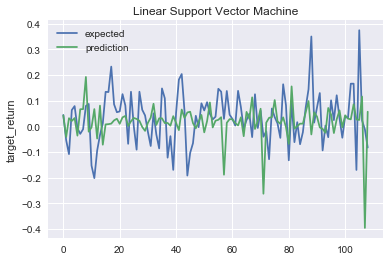

In [0]:
chart_regression(pred,y_test)

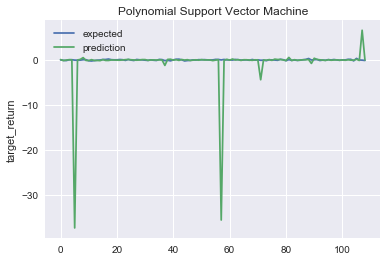

In [0]:
chart_regression(pred2,y_test)

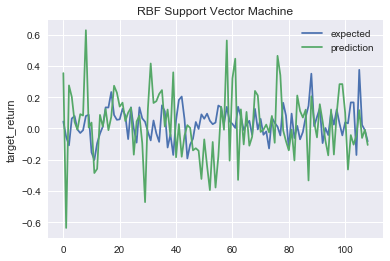

In [0]:
chart_regression(pred3,y_test)

# Visualizing Results - Regularization

In [0]:
fit_ridge = ridge.predict(X_test)
fit_lasso = lasso.predict(X_test)

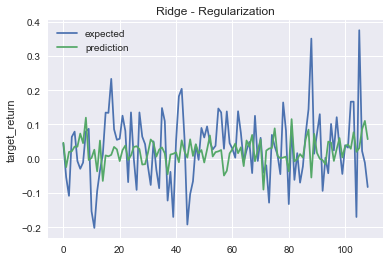

In [0]:
chart_regression(fit_ridge,y_test)

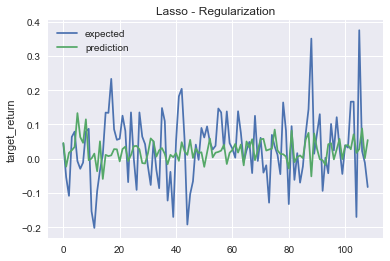

In [0]:
chart_regression(fit_lasso,y_test)